# DTree Classifer Demonstration

In this tutorial we will demonstrate how to use the `DecisionTreeClassifer` class in `scikit-learn` to perform classifications predictions. 


## 1.0 Setup
Import modules


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


np.random.seed(1)

## 2.0 Load data
Load data (it's already cleaned and preprocessed)


In [62]:
# Uncomment the following snippet of code to debug problems with finding the .csv file path
# This snippet of code will exit the program and print the current working directory.
#import os
#print(os.getcwd())

In [2]:
X_train = pd.read_csv('airbnb_train_X_price_gte_150.csv') 
y_train = pd.read_csv('airbnb_train_y_price_gte_150.csv') 
X_test = pd.read_csv('airbnb_test_X_price_gte_150.csv') 
y_test = pd.read_csv('airbnb_test_y_price_gte_150.csv') 

## NOTE: In this next section, GridSearch will use K Fold Cross Validation 

K-Fold cross validation is used to avoid overfitting. 

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. 

![cross validation diagram](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


## 3.0 Model the data

Conduct an initial random search across a wide range of possible parameters.

In [6]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(2,70),  
    'min_samples_leaf': np.arange(2,70),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 200), 
    'max_depth': np.arange(1,50), 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=50,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
The best precision score is 0.8522461746504959
... with parameters: {'min_samples_split': 6, 'min_samples_leaf': 28, 'min_impurity_decrease': 0.0031, 'max_leaf_nodes': 75, 'max_depth': 45, 'criterion': 'entropy'}


In [65]:
c_matrix = confusion_matrix(y_test, rand_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")

Accuracy=0.8462980 Precision=0.8379374 Recall=0.8568738 F1=0.8472998


Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

In [66]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(30,36),  
    'min_samples_leaf': np.arange(6,12),
    'min_impurity_decrease': np.arange(0.0048, 0.0054, 0.0001),
    'max_leaf_nodes': np.arange(162,168), 
    'max_depth': np.arange(15,21), 
    'criterion': ['entropy'],
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 9072 candidates, totalling 45360 fits
The best accuracy score is 0.8593221982497395
... with parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 162, 'min_impurity_decrease': 0.0048, 'min_samples_leaf': 8, 'min_samples_split': 30}


In [67]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")

Accuracy=0.8462980 Precision=0.8379374 Recall=0.8568738 F1=0.8472998


## 5.0 Importance of features

In [68]:
np.round(grid_search.best_estimator_.feature_importances_,2)

array([0.  , 0.  , 0.06, 0.1 , 0.71, 0.01, 0.02, 0.07, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

## 6.0 Diagrams of DTrees

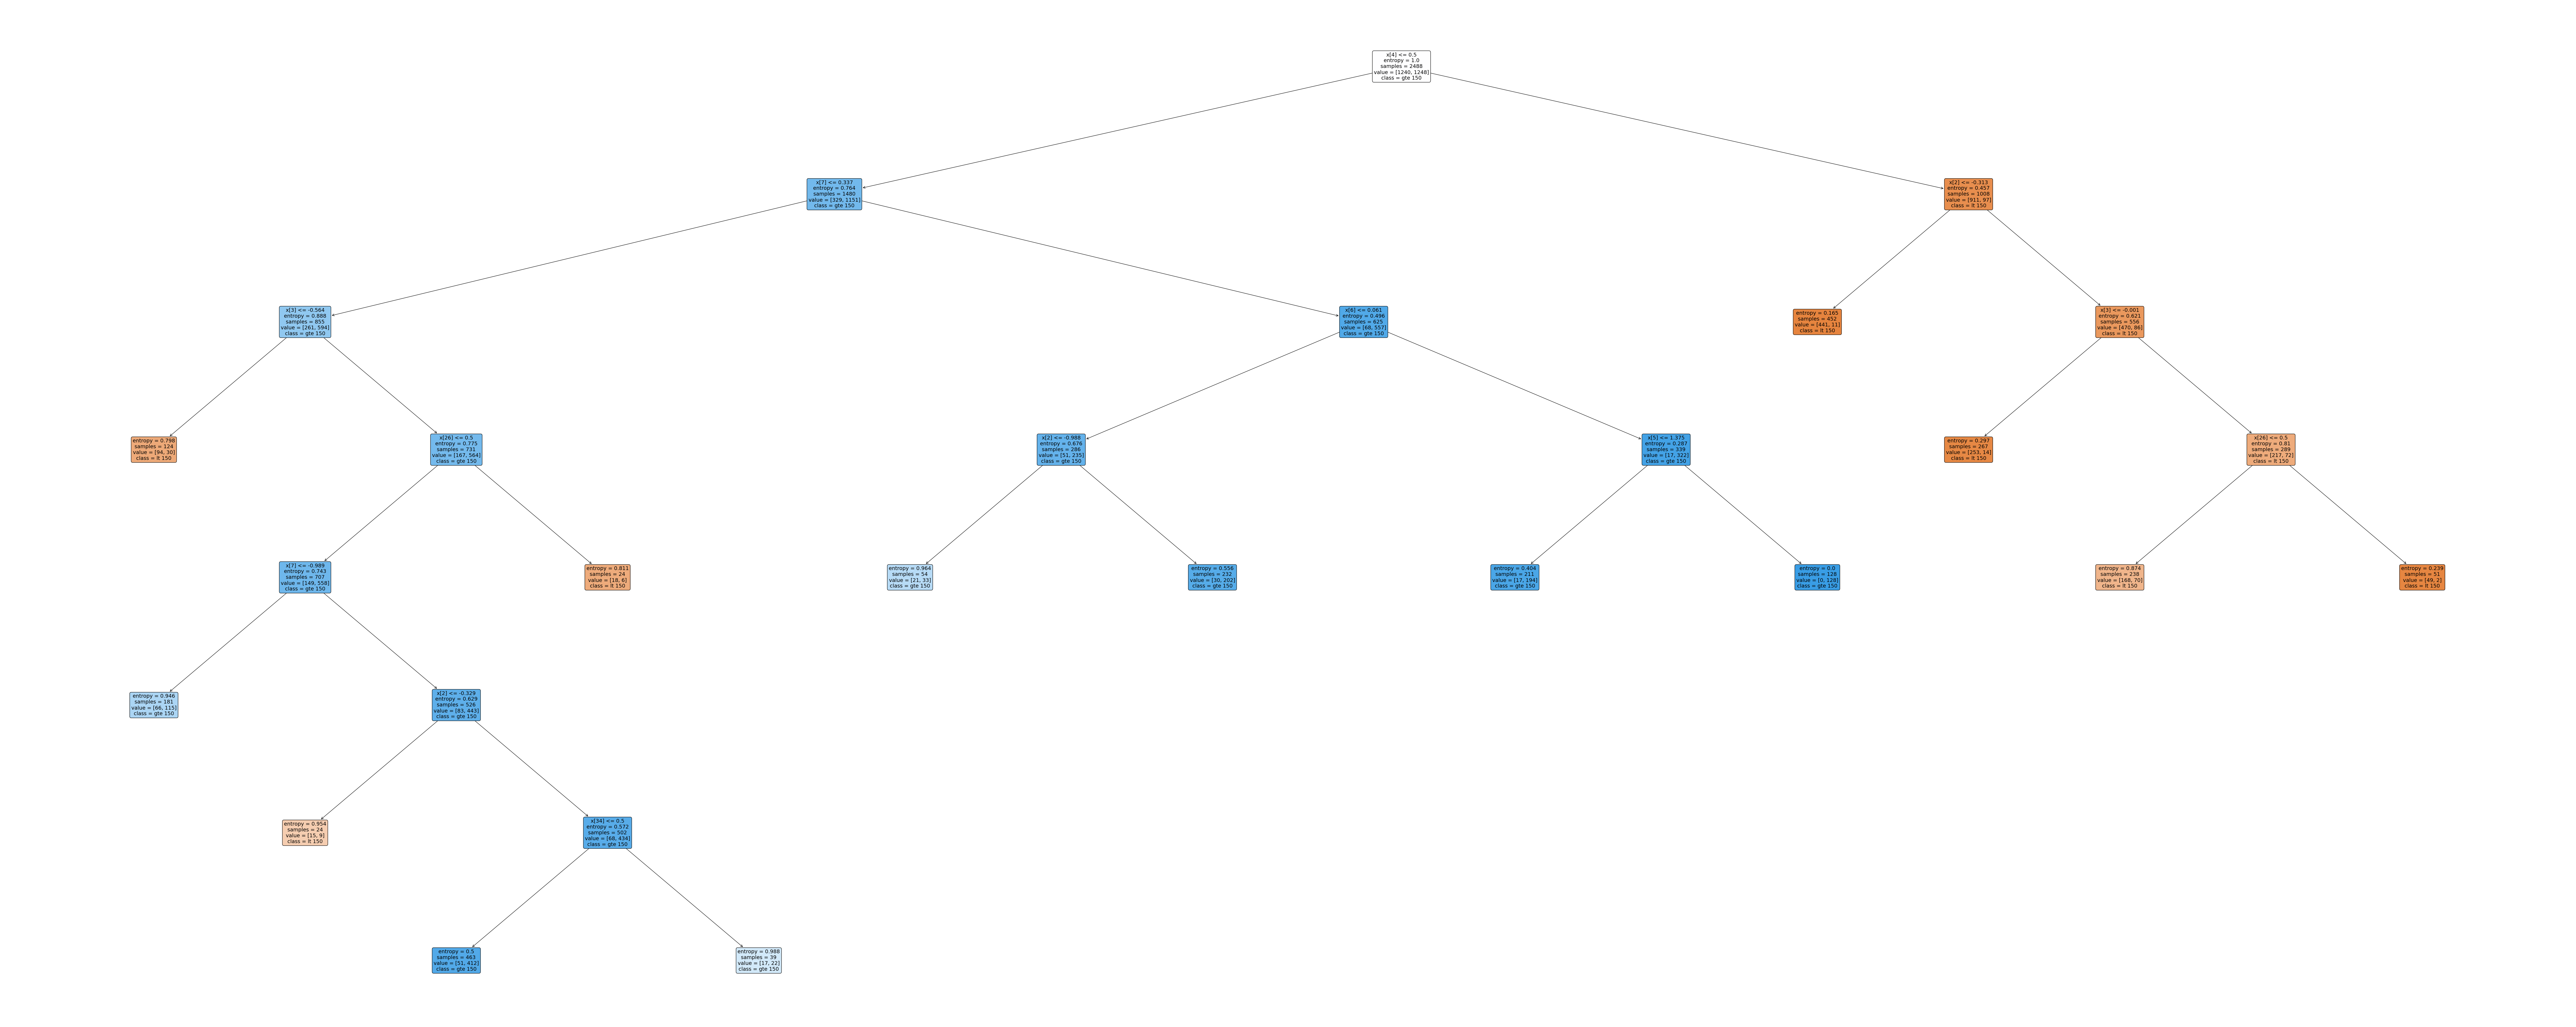

In [69]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(grid_search.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)